In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.functions_1_2 import update_concentration, analytical_solution 

In [6]:
# parameters
N = 50          # grid points
D = 1.0         # diffusion coefficient
dx = 1.0 / N    # spacing
dt = 0.25 * dx**2 / D  # timestep
time_steps = [0, 0.001, 0.01, 0.1, 1]  # selected timesteps for snapshots

# initialize field
c = np.zeros((N, N))
c[:, -1] = 1  # boundary at top

# figure with subplots
cols = len(time_steps)
fig, axes = plt.subplots(1, cols, figsize=(3 * cols, 4), constrained_layout=True)

# time evolution at snapshots
snapshots = {}
for step in range(max(time_steps) + 1):
    c = update_concentration(c, D, dx, dt, N)
    if step in time_steps:
        snapshots[step] = c.copy()

# plot all
for ax, step in zip(axes, time_steps):
    im = ax.imshow(snapshots[step].T, origin='lower', cmap='hot', extent=[0, 1, 0, 1])
    ax.set_title(f"t = {step * dt:.3f}")
    ax.set_xticks([])
    ax.set_yticks([])

# add colorbar
fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.05, label="Concentration")

plt.suptitle("Diffusion Process at Different Time Steps", fontsize=14)
plt.show()




<IPython.core.display.Javascript object>

KeyError: 0.001

c:\Users\elias\OneDrive\scientific_computing_assignment1\src\functions_1_2.py:27: RuntimeWarning: divide by zero encountered in divide
  sol += erfc((1 - y + 2 * i) / (2 * np.sqrt(D * t))) - erfc((1 + y + 2 * i) / (2 * np.sqrt(D * t)))
c:\Users\elias\OneDrive\scientific_computing_assignment1\src\functions_1_2.py:27: RuntimeWarning: invalid value encountered in divide
  sol += erfc((1 - y + 2 * i) / (2 * np.sqrt(D * t))) - erfc((1 + y + 2 * i) / (2 * np.sqrt(D * t)))


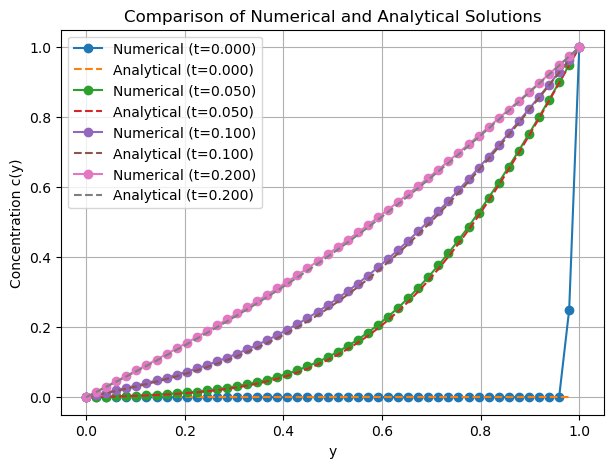

In [3]:
# initialize field
c = np.zeros((N, N))
c[:, -1] = 1  # top boundary condition

# time evolution
snapshots = {}
for step in range(max(time_steps)):
    c = update_concentration(c, D, dx, dt, N)
    
    if step in time_steps:
        snapshots[step] = c.mean(axis=0) 

# plots
y_vals = np.linspace(0, 1, N)

plt.figure(figsize=(7, 5))
for step in time_steps:
    if step in snapshots:
        plt.plot(y_vals, snapshots[step], 'o-', label=f"Numerical (t={step * dt:.3f})")
        plt.plot(y_vals, analytical_solution(y_vals, step * dt, D), '--', label=f"Analytical (t={step * dt:.3f})")

plt.xlabel("y")
plt.ylabel("Concentration c(y)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid()
plt.show()


In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



# Parameters
N = 50          # Number of grid points in x and y
D = 1.0         # Diffusion coefficient
dx = 1.0 / N    # Grid spacing
dt = 0.25 * dx**2 / D  # Stable time step
max_steps = 3500  # Maximum time steps

# Initialize concentration field
c = np.zeros((N, N))
c[:, -1] = 1  # Top boundary condition

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(c.T, origin='lower', cmap='hot', extent=[0, 1, 0, 1])
ax.set_title("Time-dependent Diffusion")
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar = fig.colorbar(im)
cbar.set_label("Concentration")

# Update function for animation
def update(frame):
    global c
    for _ in range(10):  # Update multiple steps per frame for faster animation
        c = update_concentration(c, D, dx, dt, N)
    im.set_array(c.T)  # Update image data
    ax.set_title(f"Time Step: {frame * 10}")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=max_steps//10, interval=50)

plt.show()


<IPython.core.display.Javascript object>

c:\Users\elias\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
